In [1]:
import tensorflow as tf
import numpy as np
import json
import pandas as pd
import matplotlib as plt
import os, json
import matplotlib.pyplot as plt
import math as math
import random
import seaborn as sns
from keras import regularizers
from sklearn.metrics import classification_report
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from collections import Counter
from tensorflow import feature_column
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import AlphaDropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import RNN
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Conv1D, MaxPooling1D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from scipy import stats
import numpy.random as rng

Using TensorFlow backend.


In [2]:
#Bug fix
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

In [3]:

#Reads jsonfiles. 
#Path is the path to a folder of folders where the names of the folderers are the letters of the alfabet
#josnType input is ether "Media" or "Open"
#p input is true if the path contains letter folder
def NumToWord(num):
    words = ["Again","Bathroom", "Boy", "But","Deaf","Drink","Eat","Family","Father",
            "Food","Friend","Girl","Home","Like","Man","My","Name","No","Play","Please",
            "School","Sorry","ThankYou","Tired","Understand","Woman","Work","Write",
            "Yes"]
    return words[num]

def WordToNum(wordIn):
    words = ["Again","Bathroom", "Boy", "But","Deaf","Drink","Eat","Family","Father",
            "Food","Friend","Girl","Home","Like","Man","My","Name","No","Play","Please",
            "School","Sorry","ThankYou","Tired","Understand","Woman","Work","Write",
            "Yes"]
    teller=0
    for word in words:
        if word == wordIn:
            return teller
        else:
            teller = teller +1

def getJson(path, jsonType, p):

    words = ["Again","Bathroom", "Boy", "But","Deaf","Drink","Eat","Family","Father",
            "Food","Friend","Girl","Home","Like","Man","My","Name","No","Play","Please",
            "School","Sorry","ThankYou","Tired","Understand","Woman","Work","Write",
            "Yes"]
    json_array = []
    jsonIndex = 'hand_keypoints'


    for word in words:
        wordIndex = 0
        path_to_json = path + "/" + word
    
        json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]
        json_files.sort()

        teller = 0
        
        for index, js in enumerate(json_files):
        
            with open(os.path.join(path_to_json, js)) as json_file:
                json_text = json.load(json_file)

                temp_array = []

                if(jsonType == 'Open'):
                    if (len(json_text['people'])<1):
                        continue
                    if(json_text['people'][0]['hand_left_keypoints_2d'][0]==0  and json_text['people'][0]['hand_right_keypoints_2d'][0]==0):
                        continue
                    
                        
                    temp_array.append(WordToNum(word))
                    x_right = []
                    y_right = []
                    x_left = []
                    y_left = []


                    #
                    # BENYTTER Z-SKÅR KORRIGERING
                    #

                    # TAR UT HVER TREDJE X-OG Y KOORDINAT?!?!

                    for i in range (21):
                        index_corr = i*3
                        

                        x_pos_right = json_text['people'][0]['hand_right_keypoints_2d'][0 + index_corr]
                        y_pos_right = json_text['people'][0]['hand_right_keypoints_2d'][1 + index_corr]


                        #x_pos = json_text['people'][0][jsonIndex][0 + index_corr] - json_text['people'][0][jsonIndex][0]
                        #y_pos = json_text['people'][0][jsonIndex][1 + index_corr] - json_text['people'][0][jsonIndex][1]

                        #temp_array.append(float(x_pos))
                        #temp_array.append(float(y_pos))

                        x_right.append(float(x_pos_right))
                        y_right.append(float(y_pos_right))

                        x_pos_left = json_text['people'][0]['hand_left_keypoints_2d'][0 + index_corr]
                        y_pos_left = json_text['people'][0]['hand_left_keypoints_2d'][1 + index_corr]


                        y_left.append(float(y_pos_left))
                        x_left.append(float(x_pos_left))
                        

                   
                    xMean_right = np.mean(x_right)
                    yMean_right = np.mean(y_right)
                    xstd_right = np.std(x_right)
                    ystd_right = np.std(y_right)

                    xMean_left = np.mean(x_left)
                    yMean_left = np.mean(y_left)
                    xstd_left = np.std(x_left)
                    ystd_left = np.std(y_left)


                    k = 0    
                    for k in range(0,21, 1):
                      #  temp_array.append(((x_right[k]-xMean_right)/xstd_right))
                      #  temp_array.append(((y_right[k]-yMean_right)/ystd_right))

                        if(math.isnan(((x_right[k] - xMean_right)/xstd_right))):
                                temp_array.append(0)
                        else:
                            temp_array.append(((x_right[k] - xMean_right)/xstd_right))

                        if(math.isnan(((y_right[k] - yMean_right)/ystd_right))):
                            temp_array.append(0)
                        else:
                            temp_array.append(((y_right[k] - yMean_right)/ystd_right))


                        if(math.isnan(((x_left[k] - xMean_left)/xstd_left))):
                            temp_array.append(0)
                        else:
                            temp_array.append(((x_left[k] - xMean_left)/xstd_left))

                        if(math.isnan(((y_left[k] - yMean_left)/ystd_left))):
                            temp_array.append(0)
                        else:
                            temp_array.append(((y_left[k] - yMean_left)/ystd_left))


                json_array.append(temp_array)
        wordIndex = wordIndex + 1
        print(np.array(json_array).shape)
    return json_array

In [4]:
#Gets all the data from the openpose location

openpose = "/Keypoints/Keypoints_training"

data_openpose = getJson(openpose, 'Open', True)

<ipython-input-3-7d26e03a898b>:112: RuntimeWarning: invalid value encountered in double_scalars
  if(math.isnan(((x_right[k] - xMean_right)/xstd_right))):
<ipython-input-3-7d26e03a898b>:117: RuntimeWarning: invalid value encountered in double_scalars
  if(math.isnan(((y_right[k] - yMean_right)/ystd_right))):
<ipython-input-3-7d26e03a898b>:123: RuntimeWarning: invalid value encountered in double_scalars
  if(math.isnan(((x_left[k] - xMean_left)/xstd_left))):
<ipython-input-3-7d26e03a898b>:128: RuntimeWarning: invalid value encountered in double_scalars
  if(math.isnan(((y_left[k] - yMean_left)/ystd_left))):


(3246, 85)
(4652, 85)
(6542, 85)
(8046, 85)
(9276, 85)
(10689, 85)
(12758, 85)
(13301, 85)
(15750, 85)
(19041, 85)
(21741, 85)
(24873, 85)
(28000, 85)
(30069, 85)
(32257, 85)
(33581, 85)
(35647, 85)
(37941, 85)
(40373, 85)
(41844, 85)
(44175, 85)
(46995, 85)
(49509, 85)
(52319, 85)
(54777, 85)
(56371, 85)
(58628, 85)
(60638, 85)
(62594, 85)


In [5]:
#Puts the data in dataframes
dfOpen = pd.DataFrame(data_openpose, columns=['Word', 'r_keypoint_0_x', 'r_keypoint_0_y', 'l_keypoint_0_x', 'l_keypoint_0_y', 'r_keypoint_1_x', 'r_keypoint_1_y', 'l_keypoint_1_x', 'l_keypoint_1_y', 'r_keypoint_2_x', 'r_keypoint_2_y', 'l_keypoint_2_x', 'l_keypoint_2_y', 'r_keypoint_3_x', 'r_keypoint_3_y', 'l_keypoint_3_x', 'l_keypoint_3_y', 'r_keypoint_4_x', 'r_keypoint_4_y', 'l_keypoint_4_x', 'l_keypoint_4_y', 'r_keypoint_5_x', 'r_keypoint_5_y', 'l_keypoint_5_x', 'l_keypoint_5_y', 'r_keypoint_6_x', 'r_keypoint_6_y', 'l_keypoint_6_x', 'l_keypoint_6_y', 'r_keypoint_7_x', 'r_keypoint_7_y', 'l_keypoint_7_x', 'l_keypoint_7_y', 'r_keypoint_8_x', 'r_keypoint_8_y', 'l_keypoint_8_x', 'l_keypoint_8_y', 'r_keypoint_9_x', 'r_keypoint_9_y', 'l_keypoint_9_x', 'l_keypoint_9_y', 'r_keypoint_10_x', 'r_keypoint_10_y', 'l_keypoint_10_x', 'l_keypoint_10_y', 'r_keypoint_11_x', 'r_keypoint_11_y', 'l_keypoint_11_x', 'l_keypoint_11_y', 'r_keypoint_12_x', 'r_keypoint_12_y', 'l_keypoint_12_x', 'l_keypoint_12_y', 'r_keypoint_13_x', 'r_keypoint_13_y', 'l_keypoint_13_x', 'l_keypoint_13_y', 'r_keypoint_14_x', 'r_keypoint_14_y', 'l_keypoint_14_x', 'l_keypoint_14_y', 'r_keypoint_15_x', 'r_keypoint_15_y', 'l_keypoint_15_x', 'l_keypoint_15_y', 'r_keypoint_16_x', 'r_keypoint_16_y', 'l_keypoint_16_x', 'l_keypoint_16_y', 'r_keypoint_17_x', 'r_keypoint_17_y', 'l_keypoint_17_x', 'l_keypoint_17_y', 'r_keypoint_18_x', 'r_keypoint_18_y', 'l_keypoint_18_x', 'l_keypoint_18_y', 'r_keypoint_19_x', 'r_keypoint_19_y', 'l_keypoint_19_x', 'l_keypoint_19_y', 'r_keypoint_20_x', 'r_keypoint_20_y', 'l_keypoint_20_x', 'l_keypoint_20_y'])
print(dfOpen.shape)
dfOpen.head()



(62594, 85)


,Word,r_keypoint_0_x,r_keypoint_0_y,l_keypoint_0_x,l_keypoint_0_y,r_keypoint_1_x,r_keypoint_1_y,l_keypoint_1_x,l_keypoint_1_y,r_keypoint_2_x,...,l_keypoint_18_x,l_keypoint_18_y,r_keypoint_19_x,r_keypoint_19_y,l_keypoint_19_x,l_keypoint_19_y,r_keypoint_20_x,r_keypoint_20_y,l_keypoint_20_x,l_keypoint_20_y
0,0,-0.141954,-0.349163,0.000132,2.343755,-0.674239,-0.974101,-1.150174,1.775993,-0.461315,...,1.200060,0.248915,1.383975,0.650711,0.949872,-0.201376,1.596899,-0.349163,0.799968,-0.573353
1,0,-0.188785,-0.297819,-0.095315,2.349007,-0.578194,-1.006594,-1.269013,1.738056,-0.507390,...,1.126904,0.279672,1.439558,0.619453,0.980320,-0.193332,1.581142,-0.297819,0.735671,-0.607188
2,0,-0.177188,-0.249522,-0.023887,2.362686,-0.535016,-1.158947,-1.230245,1.755707,-0.463450,...,1.182119,0.267601,1.504499,0.789812,0.880794,-0.182748,1.540270,-0.336138,0.830456,-0.574358
3,0,-0.204272,-0.216638,-0.011891,2.337495,-0.629669,-0.939475,-1.267403,1.759767,-0.452420,...,1.143110,0.245703,1.426461,0.548690,0.892008,-0.192584,1.532810,-0.344192,0.741416,-0.571097
4,0,-0.111194,-0.603474,-0.026564,2.352939,-0.703624,-0.912574,-1.241439,1.762835,-0.738485,...,1.188667,0.287554,1.457046,0.594278,0.884682,-0.204197,1.526745,-0.178473,0.783353,-0.597595


In [6]:
#Makes arrays into smaller arrays but with larger dimention
def ArrayChunkMaker(dfArray, size):
    sizeOfArrays = size
    count = 0
    LetterArrayOpen = []
    KeypointsArrayOpen = []
    tempArray = []
    tempLetterZero = ''
    tempLetter = ''


    for ar in dfArray.iloc:
        
        if count == 0:
            tempLetterZero = ar.iloc[0]
            tempLetter = ar.iloc[0]
        else:
            tempLetter = ar.iloc[0]

        if (tempLetter != tempLetterZero):             
            tempArray = []
            tempLetterZero = ''
            tempLetter = ''
            count = 0 
        else: 
            tempArray.append(ar.drop(labels = ['Word'])) 
            count = count +1

        if(count == sizeOfArrays):

            KeypointsArrayOpen.append(tempArray)
            LetterArrayOpen.append(tempLetter)
            tempArray = []
            tempLetterZero = ''
            tempLetter = ''
            count = 0 

    return LetterArrayOpen, KeypointsArrayOpen

In [7]:
#makes number innput from 0-25 into categorical arrays
def matrixArray(num):
    array = np.zeros(29)
    array[int(num)] = 1
    return array


In [8]:
sizeOfArrays = 10

Letters, keypoints = ArrayChunkMaker(dfOpen, sizeOfArrays)
print(np.array(Letters).shape)
print(np.array(keypoints).shape)
y = []

#makes the target data for the train data

for i in Letters:
    y.append(matrixArray(i))
    
print(dfOpen.shape)
x = keypoints



x_Otrain,x_Otest,y_Otrain,y_Otest = train_test_split(x,y)
print(np.array(x_Otrain).shape)
print(np.array(y_Otrain).shape)


(6243,)
(6243, 10, 84)
(62594, 85)
(4682, 10, 84)
(4682, 29)


In [9]:
keypointsNum = 84

x_Otrain = np.array(x_Otrain).reshape(len(x_Otrain), sizeOfArrays, keypointsNum)
x_Otest = np.array(x_Otest).reshape(len(x_Otest), sizeOfArrays, keypointsNum)

print(x_Otrain.shape)
print(x_Otest.shape)

(4682, 10, 84)
(1561, 10, 84)


In [10]:
data_openposeTest = getJson("/Keypoints/Keypoints_test", 'Open', True)

dfOpenTest = pd.DataFrame(data_openposeTest, columns=['Word', 'r_keypoint_0_x', 'r_keypoint_0_y', 'l_keypoint_0_x', 'l_keypoint_0_y', 'r_keypoint_1_x', 'r_keypoint_1_y', 'l_keypoint_1_x', 'l_keypoint_1_y', 'r_keypoint_2_x', 'r_keypoint_2_y', 'l_keypoint_2_x', 'l_keypoint_2_y', 'r_keypoint_3_x', 'r_keypoint_3_y', 'l_keypoint_3_x', 'l_keypoint_3_y', 'r_keypoint_4_x', 'r_keypoint_4_y', 'l_keypoint_4_x', 'l_keypoint_4_y', 'r_keypoint_5_x', 'r_keypoint_5_y', 'l_keypoint_5_x', 'l_keypoint_5_y', 'r_keypoint_6_x', 'r_keypoint_6_y', 'l_keypoint_6_x', 'l_keypoint_6_y', 'r_keypoint_7_x', 'r_keypoint_7_y', 'l_keypoint_7_x', 'l_keypoint_7_y', 'r_keypoint_8_x', 'r_keypoint_8_y', 'l_keypoint_8_x', 'l_keypoint_8_y', 'r_keypoint_9_x', 'r_keypoint_9_y', 'l_keypoint_9_x', 'l_keypoint_9_y', 'r_keypoint_10_x', 'r_keypoint_10_y', 'l_keypoint_10_x', 'l_keypoint_10_y', 'r_keypoint_11_x', 'r_keypoint_11_y', 'l_keypoint_11_x', 'l_keypoint_11_y', 'r_keypoint_12_x', 'r_keypoint_12_y', 'l_keypoint_12_x', 'l_keypoint_12_y', 'r_keypoint_13_x', 'r_keypoint_13_y', 'l_keypoint_13_x', 'l_keypoint_13_y', 'r_keypoint_14_x', 'r_keypoint_14_y', 'l_keypoint_14_x', 'l_keypoint_14_y', 'r_keypoint_15_x', 'r_keypoint_15_y', 'l_keypoint_15_x', 'l_keypoint_15_y', 'r_keypoint_16_x', 'r_keypoint_16_y', 'l_keypoint_16_x', 'l_keypoint_16_y', 'r_keypoint_17_x', 'r_keypoint_17_y', 'l_keypoint_17_x', 'l_keypoint_17_y', 'r_keypoint_18_x', 'r_keypoint_18_y', 'l_keypoint_18_x', 'l_keypoint_18_y', 'r_keypoint_19_x', 'r_keypoint_19_y', 'l_keypoint_19_x', 'l_keypoint_19_y', 'r_keypoint_20_x', 'r_keypoint_20_y', 'l_keypoint_20_x', 'l_keypoint_20_y'])


<ipython-input-3-7d26e03a898b>:112: RuntimeWarning: invalid value encountered in double_scalars
  if(math.isnan(((x_right[k] - xMean_right)/xstd_right))):
<ipython-input-3-7d26e03a898b>:117: RuntimeWarning: invalid value encountered in double_scalars
  if(math.isnan(((y_right[k] - yMean_right)/ystd_right))):
<ipython-input-3-7d26e03a898b>:123: RuntimeWarning: invalid value encountered in double_scalars
  if(math.isnan(((x_left[k] - xMean_left)/xstd_left))):
<ipython-input-3-7d26e03a898b>:128: RuntimeWarning: invalid value encountered in double_scalars
  if(math.isnan(((y_left[k] - yMean_left)/ystd_left))):


(930, 85)
(1373, 85)
(1986, 85)
(2482, 85)
(2754, 85)
(3325, 85)
(3862, 85)
(4018, 85)
(4754, 85)
(5652, 85)
(6270, 85)
(6960, 85)
(7619, 85)
(8327, 85)
(8999, 85)
(9462, 85)
(10004, 85)
(10724, 85)
(11496, 85)
(12006, 85)
(12746, 85)
(13716, 85)
(14428, 85)
(15118, 85)
(16032, 85)
(16588, 85)
(17340, 85)
(17930, 85)
(18497, 85)


In [11]:
Letters, Keypoints = ArrayChunkMaker(dfOpenTest, sizeOfArrays)
xOpen = np.array(Keypoints).reshape(len(Keypoints), sizeOfArrays, 84)

yOpen = []
#makes the target data for the test data
for i in Letters:
    yOpen.append(NumToWord(int(i)))

yOpenMatrix = []
for y in yOpen:
   yOpenMatrix.append(matrixArray(WordToNum(y)))


In [12]:
checkpoint_path = "/SavedModel/cp.cpkt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1,
                                                save_best_only=True,
                                                 monitor='val_categorical_accuracy',
                                                mode='auto')

In [13]:
INIT_LR = 1e-3
BATCH_SIZE = 1
NUM_EPOCHS = 20


dropinit = 0.1
drop = 0.3

print(x_Otrain.shape)

modelO = Sequential()
modelO.add(Conv1D(128, kernel_size=(2), activation='relu', input_shape=(x_Otrain.shape[1], x_Otrain.shape[2])))
modelO.add(MaxPooling1D(pool_size=(2)))
modelO.add(Dropout(drop))   
modelO.add(Flatten())
modelO.add(Dense(256, activation = 'relu'))
modelO.add(Dropout(drop))
modelO.add(Dense(64, activation = 'relu'))
modelO.add(Dropout(drop))

modelO.add(Dense(29, activation = 'softmax'))



decay_rate = 1e-4
adam = Adam(lr=INIT_LR, decay=decay_rate)

modelO.compile(adam, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

(4682, 10, 84)


In [14]:
print("[INFO] training network...")
HM = modelO.fit(
    np.array(x_Otrain), np.array(y_Otrain),                                 
    batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, use_multiprocessing=True, verbose=1, shuffle=True,
    validation_data=(np.array(xOpen), np.array(yOpenMatrix)), validation_freq=1, callbacks=[cp_callback])
#callbacks=[cp_callback], , validation_data=(np.array(xOpen), np.array(yOpenMatrix)), validation_freq=10

[INFO] training network...
Epoch 1/20
4663/4682 [============================>.] - ETA: 0s - loss: 1.4306 - categorical_accuracy: 0.5664
Epoch 00001: val_categorical_accuracy improved from -inf to 0.82979, saving model to /home/kwig/Desktop/Tegnspraak/jupyter/Saved_ModelOpen/WordCNN/cp.cpkt
4682/4682 [==============================] - 5s 1ms/step - loss: 1.4274 - categorical_accuracy: 0.5669 - val_loss: 0.4935 - val_categorical_accuracy: 0.8298
Epoch 2/20
4636/4682 [============================>.] - ETA: 0s - loss: 0.5817 - categorical_accuracy: 0.8082
Epoch 00002: val_categorical_accuracy improved from 0.82979 to 0.88925, saving model to /home/kwig/Desktop/Tegnspraak/jupyter/Saved_ModelOpen/WordCNN/cp.cpkt
4682/4682 [==============================] - 6s 1ms/step - loss: 0.5804 - categorical_accuracy: 0.8086 - val_loss: 0.3123 - val_categorical_accuracy: 0.8893
Epoch 3/20
4663/4682 [============================>.] - ETA: 0s - loss: 0.3841 - categorical_accuracy: 0.8679
Epoch 00003: val

In [15]:
modelO.load_weights('SavedModel/cp.cpkt')

modelO.evaluate(np.array(x_Otrain), np.array(y_Otrain), 1)
modelO.evaluate(np.array(x_Otest), np.array(y_Otest), 1)

1561/1561 [==============================] - 1s 510us/step - loss: 0.1028 - categorical_accuracy: 0.9840


[0.10283268243074417, 0.983984649181366]

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


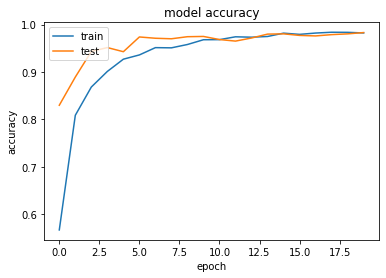

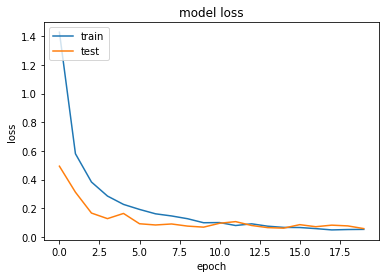

In [16]:
print(HM.history.keys())
# summarize history for accuracy
plt.plot(HM.history['categorical_accuracy'])
plt.plot(HM.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(HM.history['loss'])
plt.plot(HM.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
predOpenArray = []
chartArrayOpen = np.zeros((29,29))
predict = modelO.predict(np.array(xOpen))

modelO.save('/SavedModel/model.h5')

In [18]:
#Array for the heatmap
for i in range (0, len(xOpen), 1):
    predOpenArray.append(NumToWord(np.argmax(predict[i])))
    chartArrayOpen[WordToNum(yOpen[i])][np.argmax(predict[i])] += 1
    if (i%1==0):
        topTwo = np.argpartition(predict[i], -2)[-2:]
        print("pred: ", NumToWord(topTwo[1]), int(predict[i][topTwo[1]]*100),"%", ", ", NumToWord(topTwo[0]) , int(predict[i][topTwo[0]]*100),"%", "Solution: ",yOpen[i], "index: ", i)

for i in range(29):
    chartArrayOpen[i] = chartArrayOpen[i]/np.sum(chartArrayOpen[i])

chartArrayOpen = np.around(chartArrayOpen, decimals=10)
res = pd.DataFrame(chartArrayOpen)

for i in range (29):
    res = res.rename(columns={i: NumToWord(i)}, index={i: NumToWord(i)})

pred:  Again 100 % ,  School 0 % Solution:  Again index:  0
pred:  Again 100 % ,  Family 0 % Solution:  Again index:  1
pred:  Again 100 % ,  Family 0 % Solution:  Again index:  2
pred:  Again 100 % ,  Father 0 % Solution:  Again index:  3
pred:  Again 99 % ,  Like 0 % Solution:  Again index:  4
pred:  Again 100 % ,  Father 0 % Solution:  Again index:  5
pred:  Again 100 % ,  Father 0 % Solution:  Again index:  6
pred:  Again 100 % ,  School 0 % Solution:  Again index:  7
pred:  Again 100 % ,  Family 0 % Solution:  Again index:  8
pred:  Again 100 % ,  Family 0 % Solution:  Again index:  9
pred:  Again 100 % ,  Family 0 % Solution:  Again index:  10
pred:  Again 100 % ,  Family 0 % Solution:  Again index:  11
pred:  Again 100 % ,  Family 0 % Solution:  Again index:  12
pred:  Again 100 % ,  Father 0 % Solution:  Again index:  13
pred:  Again 100 % ,  Father 0 % Solution:  Again index:  14
pred:  Again 100 % ,  Father 0 % Solution:  Again index:  15
pred:  Again 99 % ,  ThankYou 0 % Sol

<AxesSubplot:>

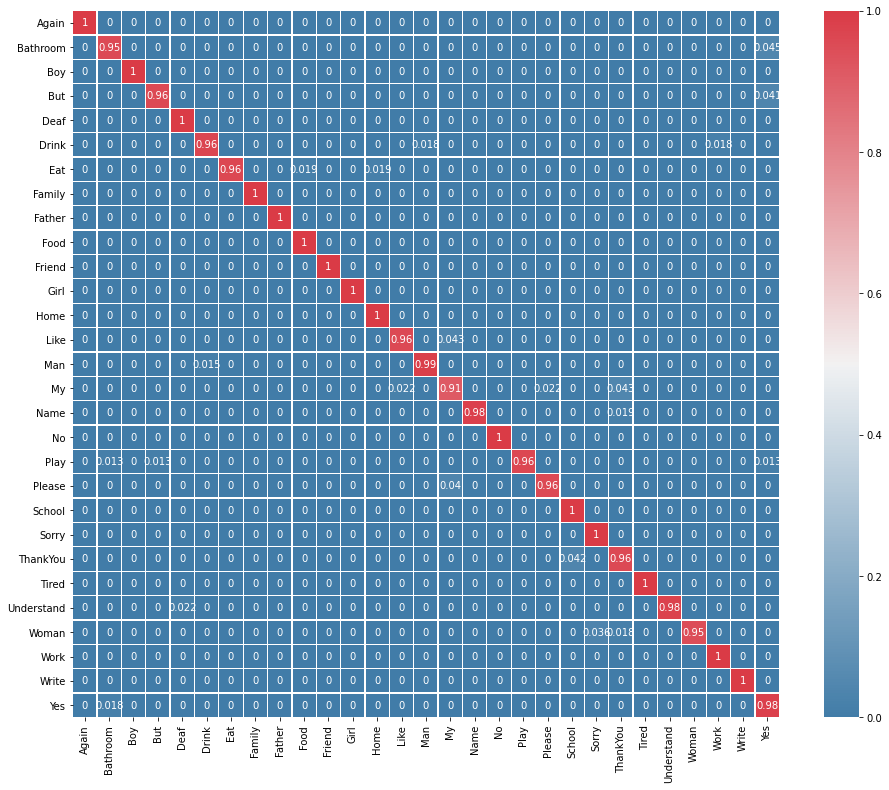

In [19]:
f, ax = plt.subplots(figsize=(16, 13))

sns.heatmap(res, mask=np.zeros_like(res, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax, linewidth=0.3, annot=True)